# 네이버 검색 API 서비스

## 네이버 블로그 검색 API(메가커피)

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import json 
import re

client_id = "D7jLV6VCs4lIXYM8XqmX"
client_secret = "Zi_dUGUEzQ"

query = urllib.parse.quote(input("검색 질의 :"))
idx=0
display=100
start=1
end=1000
sort='sim'

blog_df=pd.DataFrame(columns=("Title", "Link","Description","Blogger name","Blogger link", "Post Date"))


for start_index in range(start, end, display):

  url = "https://openapi.naver.com/v1/search/blog?query=" + query\
        + "&display="+str(display)\
        + "&start="+str(start_index)\
        + "&sort="+sort

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()
  if(rescode==200):
      response_body = response.read()
      response_dict = json.loads(response_body.decode('utf-8'))
      items=response_dict['items']
      for item_index in range(0, len(items)):
        remove_tag=re.compile('<.*?>')
        title = re.sub(remove_tag, '', items[item_index]['title'])
        link=items[item_index]['link']
        description=re.sub(remove_tag, '', items[item_index]['description'])
        blogger_name=items[item_index]['bloggername']
        blogger_link=items[item_index]['bloggerlink']
        post_date=items[item_index]['postdate']
        blog_df.loc[idx]=[title, link, description, blogger_name, blogger_link, post_date]
        idx+=1

  else:
      print("Error Code:" + rescode)

blog_df.to_csv('네이버API_블로그_메가커피.csv')

## 데이터프레임화

In [ ]:
import pandas as pd
blog_df=pd.read_csv('네이버API_블로그_메가커피.csv')
blog_df.head()

In [5]:
# 컬럼명 지정
df=pd.DataFrame(blog_df[['Title','Description','Post Date']])
df.head()

Title  \
0                메가커피 메뉴 추천 가격 및 솔직 후기   
1  빽다방 아샷추 / 메가커피 아샷추 비교후기 및 가격,칼로리 정보   
2            메가커피 창업비용 신규오픈과 앞으로 전망 예상   
3                 메가커피 메뉴 퐁크러쉬 등 4종 후기   
4              메가커피 메뉴 추천 디카페인 콜드브루 가격   

                                         Description  Post Date  
0  탄방역에서 도보 4분 거리에 번화가에 위치해있었고, 간판에는 커다란 커피잔 그림이 ...   20211001  
1  우리동네 특징 빽다방-메가커피-컴포즈커피-디저트39 줄줄이 붙어있음 ㅎ 칼로리와 당...   20210917  
2  메가커피 신규 창업비용 예상 이제는 매우 대중적인 프랜차이즈로 자리잡은 메가커피입니...   20211016  
3  우선 메가커피 메뉴부터 살펴보았는데요. 커피, 초코, 라떼, 에이드와 모히또, 스무...   20210523  
4  마실 커피도 Take out을 했는데요 오늘 포스팅은 메가커피 전체 메뉴 총정리와 ...   20211022

# < 워드클라우드 시각화 >

# 필요 모듈 불러오기

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

In [8]:
# Description column을 하나의 문자열로 통합
blog_list=' '.join(df['Description'])
blog_list

"탄방역에서 도보 4분 거리에 번화가에 위치해있었고, 간판에는 커다란 커피잔 그림이 그려져있어... 에이드는 모름지기 톡 쏘는 탄산 맛이 강한 스타일을 선호하는데, 메가커피 메뉴 추천으로 선택한 메가...  우리동네 특징 빽다방-메가커피-컴포즈커피-디저트39 줄줄이 붙어있음 ㅎ 칼로리와 당류에 뒤집어지게 놀랐지만 마지막으로(?) 메가커피에서도 도전해보고 싶었다. 메가커피 아샷추 아쉽게도 이 곳에서는 따로...  메가커피 신규 창업비용 예상 이제는 매우 대중적인 프랜차이즈로 자리잡은 메가커피입니다. 저가커피에서는 가장 매출력이 좋아서 창업에서도 인기가 매우 높습니다. 그만큼 관심도가 상당하기 때문에...  우선 메가커피 메뉴부터 살펴보았는데요. 커피, 초코, 라떼, 에이드와 모히또, 스무디와 프라페, 흑당, 티와 주스로 모든 음료 종류를 섭렵하고 있는 곳으로 선택의 폭이 넓은 게 특징이었어요. 기본 메뉴로...  마실 커피도 Take out을 했는데요 오늘 포스팅은 메가커피 전체 메뉴 총정리와 가격 정보 및 추천하는 음료 리스트 &amp; 디카페인 콜드브루와 큐브라떼 마셔본 솔직 담백한 후기입니다 메가커피 메뉴 &amp; 추천 해피...  메가커피 메뉴(음료와 커피) 입구에는 배너가 자리하고 있어서 다양한 메가커피 메뉴들을 살펴볼 수... 3,900원에 먹을 수 있는 큐브라떼, 민트프라페, 플레인퐁크러쉬 쿠키프라페, 메가에이드에 4,500원의...  여름보다는 커피를 덜 마시는 시즌이라 11월에 위드 코로나로 들어선다 해도 빠져버린 매출은 누가... ㅋㅋㅋ 암튼 많은 댓글과 정보 부탁드립니다 #메가커피 #메가 #카페창업 #메가커피창업 #메가커피창업비용 요즘 핫한 메가커피 다들 아시죠? 저희 회사 근처에도 있어서 가끔 점심 후 후식으로 사먹고 있어요 요즘은 비싼 커피와 음료보다 이렇게 저렴하면서 양이 많은 프렌차이즈가 정말 잘나가는것 같아요 저 또한...  테이크아웃 커피의 최강자 메가커피가 지금도 창업 할만한지 알아보도록 하겠습니다. 빅데이터를 통해 메가커피의 

# 형태소 분리 - 토큰화 

In [5]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [6]:
# 네이버블로그 본문을 형태소로 토큰화
blog_list=word_tokenize(blog_list)
blog_list

['탄방역에서',
 '도보',
 '4분',
 '거리에',
 '번화가에',
 '위치해있었고',
 ',',
 '간판에는',
 '커다란',
 '커피잔',
 '그림이',
 '그려져있어',
 '...',
 '에이드는',
 '모름지기',
 '톡',
 '쏘는',
 '탄산',
 '맛이',
 '강한',
 '스타일을',
 '선호하는데',
 ',',
 '메가커피',
 '메뉴',
 '추천으로',
 '선택한',
 '메가',
 '...',
 '우리동네',
 '특징',
 '빽다방-메가커피-컴포즈커피-디저트39',
 '줄줄이',
 '붙어있음',
 'ㅎ',
 '칼로리와',
 '당류에',
 '뒤집어지게',
 '놀랐지만',
 '마지막으로',
 '(',
 '?',
 ')',
 '메가커피에서도',
 '도전해보고',
 '싶었다',
 '.',
 '메가커피',
 '아샷추',
 '아쉽게도',
 '이',
 '곳에서는',
 '따로',
 '...',
 '메가커피',
 '신규',
 '창업비용',
 '예상',
 '이제는',
 '매우',
 '대중적인',
 '프랜차이즈로',
 '자리잡은',
 '메가커피입니다',
 '.',
 '저가커피에서는',
 '가장',
 '매출력이',
 '좋아서',
 '창업에서도',
 '인기가',
 '매우',
 '높습니다',
 '.',
 '그만큼',
 '관심도가',
 '상당하기',
 '때문에',
 '...',
 '우선',
 '메가커피',
 '메뉴부터',
 '살펴보았는데요',
 '.',
 '커피',
 ',',
 '초코',
 ',',
 '라떼',
 ',',
 '에이드와',
 '모히또',
 ',',
 '스무디와',
 '프라페',
 ',',
 '흑당',
 ',',
 '티와',
 '주스로',
 '모든',
 '음료',
 '종류를',
 '섭렵하고',
 '있는',
 '곳으로',
 '선택의',
 '폭이',
 '넓은',
 '게',
 '특징이었어요',
 '.',
 '기본',
 '메뉴로',
 '...',
 '마실',
 '커피도',
 'Take',
 'out을',
 '했는데요',
 '오늘',
 '포스팅은',
 '메가커피

In [7]:
# 두글자 이상만 출력
blog_list = [n for n in blog_list if len(n) > 1]
blog_list[:100]

['탄방역에서',
 '도보',
 '4분',
 '거리에',
 '번화가에',
 '위치해있었고',
 '간판에는',
 '커다란',
 '커피잔',
 '그림이',
 '그려져있어',
 '...',
 '에이드는',
 '모름지기',
 '쏘는',
 '탄산',
 '맛이',
 '강한',
 '스타일을',
 '선호하는데',
 '메가커피',
 '메뉴',
 '추천으로',
 '선택한',
 '메가',
 '...',
 '우리동네',
 '특징',
 '빽다방-메가커피-컴포즈커피-디저트39',
 '줄줄이',
 '붙어있음',
 '칼로리와',
 '당류에',
 '뒤집어지게',
 '놀랐지만',
 '마지막으로',
 '메가커피에서도',
 '도전해보고',
 '싶었다',
 '메가커피',
 '아샷추',
 '아쉽게도',
 '곳에서는',
 '따로',
 '...',
 '메가커피',
 '신규',
 '창업비용',
 '예상',
 '이제는',
 '매우',
 '대중적인',
 '프랜차이즈로',
 '자리잡은',
 '메가커피입니다',
 '저가커피에서는',
 '가장',
 '매출력이',
 '좋아서',
 '창업에서도',
 '인기가',
 '매우',
 '높습니다',
 '그만큼',
 '관심도가',
 '상당하기',
 '때문에',
 '...',
 '우선',
 '메가커피',
 '메뉴부터',
 '살펴보았는데요',
 '커피',
 '초코',
 '라떼',
 '에이드와',
 '모히또',
 '스무디와',
 '프라페',
 '흑당',
 '티와',
 '주스로',
 '모든',
 '음료',
 '종류를',
 '섭렵하고',
 '있는',
 '곳으로',
 '선택의',
 '폭이',
 '넓은',
 '특징이었어요',
 '기본',
 '메뉴로',
 '...',
 '마실',
 '커피도',
 'Take',
 'out을',
 '했는데요']

# 불용어 지정 (수기)

In [8]:
# 불용어 지정 (워드클라우드 작성)
stop_words = ['메가커피', '메가','메가커피는','메가커피에서','메가커피가','메가커피를','메가커피의','메가커피에', '...', '....','..', '.','있어서', '이번에','오늘','커피를','하고','나온','있는', '이디야에', '이디야가', \
             '이디야커피', '자주', '너무', '자주', '많이', '제가','진짜','저는','그래서', 'quot',\
             '오늘은','있는','바로','요즘', '안녕하세요', 'amp', '그래서', '정말', '해서', '잔짜','커피가',\
             'ㅎㅎ','있다', 'ㅋㅋ', 'gt', '입니다', '사실', '가는','메뉴','가격',\
             '있어요','ㅋㅋㅋ','It','한번','아주','많은','EDIYA','다시','했는데',\
              '내가','이렇게','때문에','보니','보고','^^','앞에','먹고','함께','오랜만에','있고',\
              '나는','근데','그리고','90','가는','이디야에서','커피','카페','이디야는','이디야를','같아요','그냥','ㅋㅋㅋㅋ'
             ] 

blog_list = [i for i in blog_list if i not in stop_words]

# 상위 검색어 300개 추출

In [9]:
from collections import Counter
count = Counter(blog_list) #결과값은 (태그 : 빈도)의 튜플형태로 저장한다 
tag_300 = count.most_common(300) #상위검색어 300개

In [10]:
tag_300

[('아메리카노', 57),
 ('음료', 48),
 ('마카롱', 45),
 ('콜드브루', 41),
 ('퐁크러쉬', 41),
 ('좋은', 40),
 ('메가에이드', 37),
 ('프라페', 36),
 ('다른', 36),
 ('가성비', 35),
 ('브랜드', 35),
 ('신메뉴', 35),
 ('스무디', 33),
 ('저렴한', 32),
 ('가격은', 32),
 ('커피는', 32),
 ('메뉴가', 32),
 ('감자빵', 31),
 ('맛도', 31),
 ('가장', 30),
 ('다양한', 30),
 ('테이크아웃', 30),
 ('매장', 30),
 ('좋아하는', 29),
 ('라떼', 28),
 ('에이드', 28),
 ('맛이', 27),
 ('있습니다', 27),
 ('큐브라떼', 26),
 ('엄청', 26),
 ('역시', 26),
 ('메가커피창업', 25),
 ('가격이', 25),
 ('춘천', 25),
 ('이제', 25),
 ('할로윈', 25),
 ('음료를', 24),
 ('메뉴는', 23),
 ('프랜차이즈', 23),
 ('있는데', 23),
 ('달달한', 23),
 ('같이', 23),
 ('양이', 21),
 ('가격도', 21),
 ('코코넛', 21),
 ('딸기라떼', 21),
 ('메가초코', 21),
 ('칼로리', 21),
 ('같은', 21),
 ('양도양수', 21),
 ('추천', 20),
 ('제일', 20),
 ('근처에', 20),
 ('토피넛', 20),
 ('많고', 20),
 ('처음', 20),
 ('메가리카노', 19),
 ('양도', 19),
 ('거의', 19),
 ('뭔가', 19),
 ('맛있는', 19),
 ('메가커피로', 19),
 ('가서', 19),
 ('초코', 18),
 ('모히또', 18),
 ('창업', 18),
 ('항상', 18),
 ('코코넛커피스무디', 18),
 ('사이즈', 18),
 ('메뉴를', 18),
 ('ㅎㅎㅎ', 18),
 ('이

# 워드클라우드로 시각화

In [11]:
# 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt #시각화
from wordcloud import WordCloud #워드클라우드

font_path = "/Library/Fonts/AppleGothic.ttf" 

In [12]:
wc = WordCloud(font_path=font_path,
               background_color="white",
               width=1200, #글자해상도 설정
               height=700 )
cloud = wc.generate_from_frequencies(dict(tag_300)) #단어빈도사전 매소드
                                     
plt.figure(figsize = (30, 20))
plt.imshow(wc,interpolation='bilinear') #이미지 처리방법 : 부드럽게 (bilinear)
plt.axis=('off') #x,y축 없앰
plt.show(cloud)  
wc.to_file('메가커피.png')

# 위와 동일한 방식으로 타 중저가 브랜드 커피 네이버 블로그 검색 API

## 네이버 블로그 검색 API(이디야)

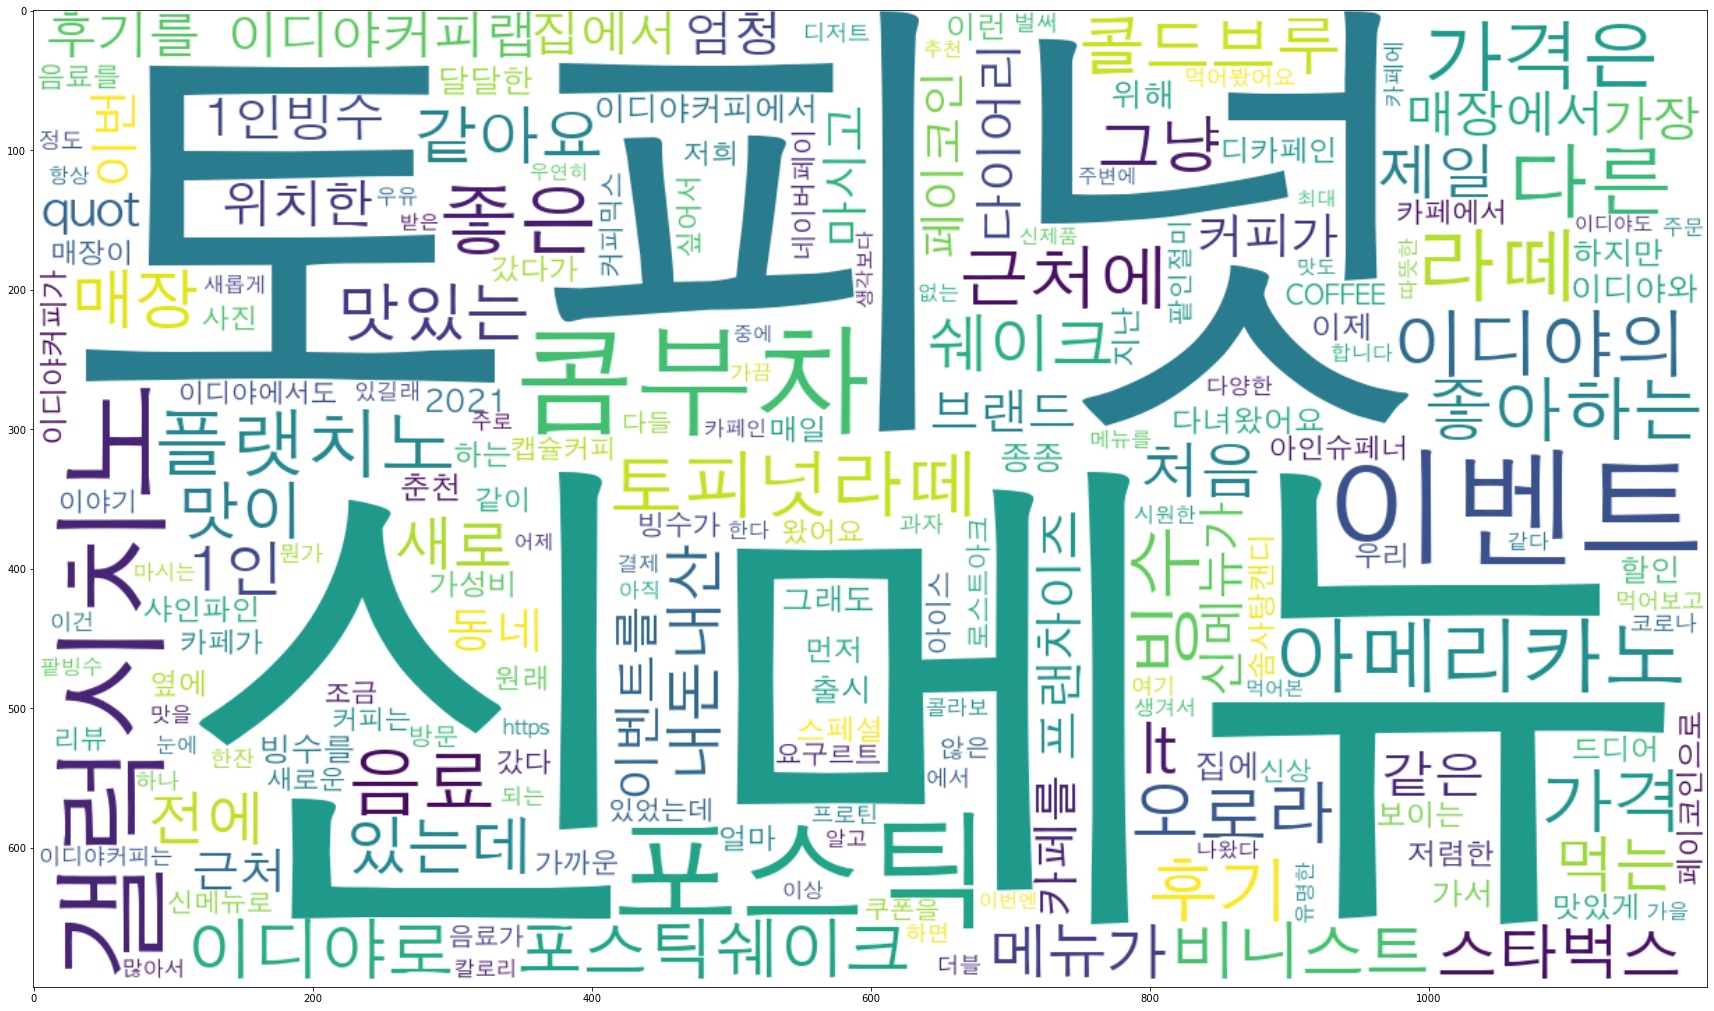

In [19]:
import pandas as pd
blog_df=pd.read_csv('네이버API_블로그_이디야.csv')
blog_df.head()

df=pd.DataFrame(blog_df[['Title','Description','Post Date']])
df.head()

import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud


blog_list=' '.join(df['Description'])

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

blog_list=word_tokenize(blog_list)
blog_list

blog_list = [n for n in blog_list if len(n) > 1]
blog_list[:100]

# 불용어 지정 (워드클라우드 작성)
stop_words = ['이디야' , '...', '....','..', '.','있어서', '이번에','오늘','커피를','하고','나온','있는', '이디야에', '이디야가', \
             '이디야커피', '자주', '너무', '자주', '많이', '제가','진짜','저는','그래서', \
             '오늘은','있는','바로','요즘', '안녕하세요', 'amp', '그래서', '정말', '해서', '잔짜',\
             'ㅎㅎ','있다', 'ㅋㅋ', 'gt', '입니다', '사실', '가는','메뉴',\
             '있어요','ㅋㅋㅋ','It','한번','아주','많은','EDIYA','다시','했는데',\
              '내가','이렇게','때문에','보니','보고','^^','앞에','먹고','함께','오랜만에','있고','그런데',\
              '나는','근데','그리고','90','가는','이디야에서','커피','카페','이디야는','이디야를',
             ] 

blog_list = [i for i in blog_list if i not in stop_words]

from collections import Counter
count = Counter(blog_list) #결과값은 (태그 : 빈도)의 튜플형태로 저장한다 
tag_300 = count.most_common(300) #상위검색어 300개

# 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt #시각화
from wordcloud import WordCloud #워드클라우드

font_path = "/Library/Fonts/AppleGothic.ttf" 

wc = WordCloud(font_path=font_path,
               background_color="white",
               width=1200, #글자해상도 설정
               height=700 )
cloud = wc.generate_from_frequencies(dict(tag_300)) #단어빈도사전 매소드
                                     
plt.figure(figsize = (30, 20))
plt.imshow(wc,interpolation='bilinear') #이미지 처리방법 : 부드럽게 (bilinear)
plt.axis=('off') #x,y축 없앰
plt.show(cloud)  
wc.to_file('이디야.png')


## 네이버 블로그 검색 API(빽다방)

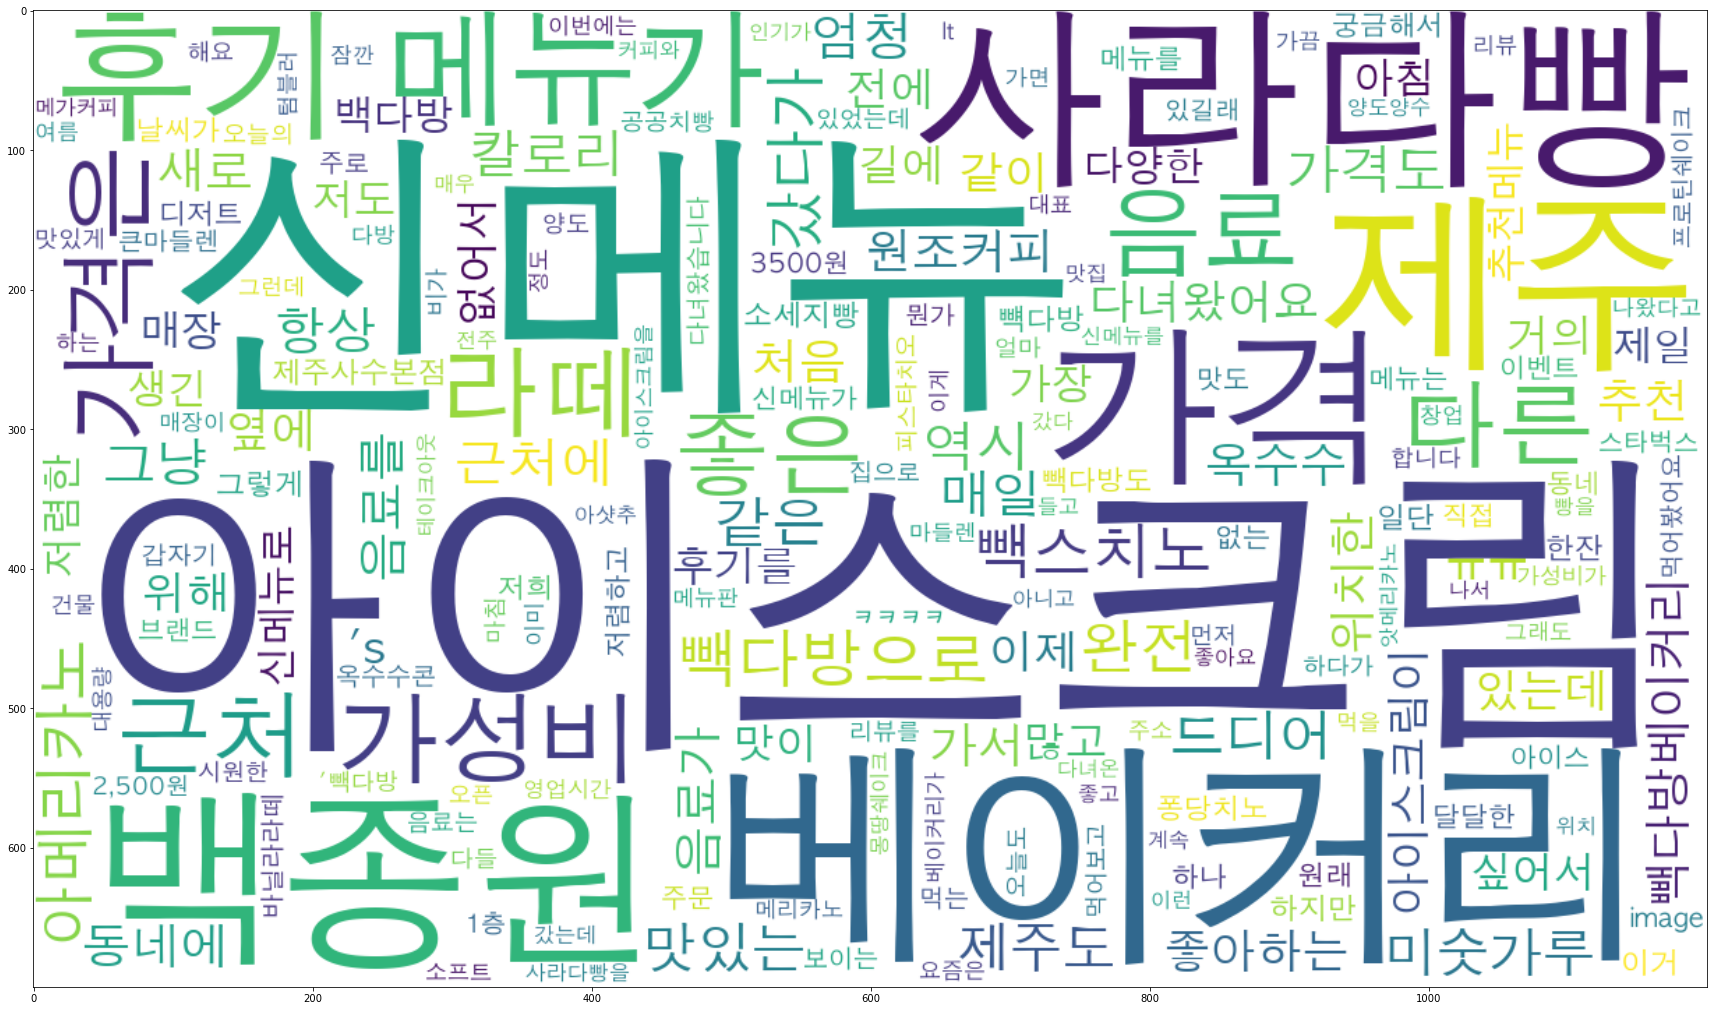

In [18]:
import pandas as pd
blog_df=pd.read_csv('네이버API_블로그_빽다방.csv')
blog_df.head()

df=pd.DataFrame(blog_df[['Title','Description','Post Date']])
df.head()

import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud


blog_list=' '.join(df['Description'])

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

blog_list=word_tokenize(blog_list)
blog_list

blog_list = [n for n in blog_list if len(n) > 1]
blog_list[:100]

# 3.불용어 지정 (워드클라우드 작성)
stop_words = ['빽다방', '빽다방이','빽다방에서','빽다방은','빽다방을','빽다방의','빽다방에', '...', '....','..', '.','있어서', '이번에','오늘','커피를','하고','나온','있는', '이디야에', '이디야가', \
             '이디야커피', '자주', '너무', '자주', '많이', '제가','진짜','저는','그래서', 'quot',\
             '오늘은','있는','바로','요즘', '안녕하세요', 'amp', '그래서', '정말', '해서', '잔짜','커피가',\
             'ㅎㅎ','있다', 'ㅋㅋ', 'gt', '입니다', '사실', '가는','메뉴',\
             '있어요','ㅋㅋㅋ','It','한번','아주','많은','EDIYA','다시','했는데',\
              '내가','이렇게','때문에','보니','보고','^^','앞에','먹고','함께','오랜만에','있고',\
              '나는','근데','그리고','90','가는','이디야에서','커피','카페','이디야는','이디야를','같아요',
             ] 

blog_list = [i for i in blog_list if i not in stop_words]

from collections import Counter
count = Counter(blog_list) #결과값은 (태그 : 빈도)의 튜플형태로 저장한다 
tag_300 = count.most_common(300) #상위검색어 300개

# 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt #시각화
from wordcloud import WordCloud #워드클라우드

font_path = "/Library/Fonts/AppleGothic.ttf" 

wc = WordCloud(font_path=font_path,
               background_color="white",
               width=1200, #글자해상도 설정
               height=700 )
cloud = wc.generate_from_frequencies(dict(tag_300)) #단어빈도사전 매소드
                                     
plt.figure(figsize = (30, 20))
plt.imshow(wc,interpolation='bilinear') #이미지 처리방법 : 부드럽게 (bilinear)
plt.axis=('off') #x,y축 없앰
plt.show(cloud)  
wc.to_file('빽다방.png')


## 네이버 블로그 검색 API(더벤티)

In [20]:
import pandas as pd
blog_df=pd.read_csv('네이버API_블로그_더벤티.csv')
blog_df.head()

df=pd.DataFrame(blog_df[['Title','Description','Post Date']])
df.head()

import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud


blog_list=' '.join(df['Description'])

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

blog_list=word_tokenize(blog_list)
blog_list

blog_list = [n for n in blog_list if len(n) > 1]
blog_list[:100]

# 3.불용어 지정 (워드클라우드 작성)
stop_words = ['더벤티', '벤티','더벤티는','더벤티가','더벤티에서','더벤티의','더벤티에','가격은', '...', '....','..', '.','있어서', '이번에','오늘','커피를','하고','나온','있는', '이디야에', '이디야가', \
             '이디야커피', '자주', '너무', '자주', '많이', '제가','진짜','저는','그래서', 'quot',\
             '오늘은','있는','바로','요즘', '안녕하세요', 'amp', '그래서', '정말', '해서', '잔짜','커피가',\
             'ㅎㅎ','있다', 'ㅋㅋ', 'gt', '입니다', '사실', '가는','메뉴',\
             '있어요','ㅋㅋㅋ','It','한번','아주','많은','EDIYA','다시','했는데',\
              '내가','이렇게','때문에','보니','보고','^^','앞에','먹고','함께','오랜만에','있고',\
              '나는','근데','그리고','90','가는','이디야에서','커피','카페','이디야는','음료를','이디야를','같아요',
             ] 

blog_list = [i for i in blog_list if i not in stop_words]

from collections import Counter
count = Counter(blog_list) #결과값은 (태그 : 빈도)의 튜플형태로 저장한다 
tag_300 = count.most_common(300) #상위검색어 300개

# 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt #시각화
from wordcloud import WordCloud #워드클라우드

font_path = "/Library/Fonts/AppleGothic.ttf" 

wc = WordCloud(font_path=font_path,
               background_color="white",
               width=1200, #글자해상도 설정
               height=700 )
cloud = wc.generate_from_frequencies(dict(tag_300)) #단어빈도사전 매소드
                                     
plt.figure(figsize = (30, 20))
plt.imshow(wc,interpolation='bilinear') #이미지 처리방법 : 부드럽게 (bilinear)
plt.axis=('off') #x,y축 없앰
plt.show(cloud)  
wc.to_file('더벤티.png')


## 네이버 블로그 검색 API(컴포즈커피)

In [21]:
import pandas as pd
blog_df=pd.read_csv('네이버API_블로그_컴포즈커피.csv')
blog_df.head()

df=pd.DataFrame(blog_df[['Title','Description','Post Date']])
df.head()

import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud


blog_list=' '.join(df['Description'])

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

blog_list=word_tokenize(blog_list)
blog_list

blog_list = [n for n in blog_list if len(n) > 1]
blog_list[:100]

# 3.불용어 지정 (워드클라우드 작성)
stop_words = ['컴포즈커피', '컴포즈','컴포즈커피는','컴포즈커피가','컴포즈커피에서','컴포즈커피의','컴포트커피에', '...', '....','..', '.','있어서', '이번에','오늘','커피를','하고','나온','있는', '이디야에', '이디야가', \
             '이디야커피', '자주', '너무', '자주', '많이', '제가','진짜','저는','그래서', 'quot','높은',\
             '오늘은','있는','바로','요즘', '안녕하세요', 'amp', '그래서', '정말', '해서', '잔짜','커피가',\
             'ㅎㅎ','있다', 'ㅋㅋ', 'gt', '입니다', '사실', '가는','메뉴','컴포즈는',\
             '있어요','ㅋㅋㅋ','It','한번','아주','많은','EDIYA','다시','했는데','있습니다',\
              '내가','이렇게','때문에','보니','보고','^^','앞에','먹고','함께','오랜만에','있고',\
              '나는','근데','그리고','90','가는','이디야에서','커피','카페','이디야는','이디야를','같아요',
             ] 

blog_list = [i for i in blog_list if i not in stop_words]

from collections import Counter
count = Counter(blog_list) #결과값은 (태그 : 빈도)의 튜플형태로 저장한다 
tag_300 = count.most_common(300) #상위검색어 300개

# 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt #시각화
from wordcloud import WordCloud #워드클라우드

font_path = "/Library/Fonts/AppleGothic.ttf" 

wc = WordCloud(font_path=font_path,
               background_color="white",
               width=1200, #글자해상도 설정
               height=700 )
cloud = wc.generate_from_frequencies(dict(tag_300)) #단어빈도사전 매소드
                                     
plt.figure(figsize = (30, 20))
plt.imshow(wc,interpolation='bilinear') #이미지 처리방법 : 부드럽게 (bilinear)
plt.axis=('off') #x,y축 없앰
plt.show(cloud)  
wc.to_file('컴포즈커피.png')
